## PROJECT: Understanding Staff Dissatisfaction - Employee Exit Survey

Data is from an exit survey of employees from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The project is aimed at understanding the possible reasons as to why staffs leave the institutes. Are there some kind of dissatisfaction? Or, are staffs resignation reasons common to how long an exployee has stayed in the company? Project explores this and more!

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading data into pandas dataframe
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
#an overview of the DETE survey data
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.tail()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN
821,823,Resignation-Move overseas/interstate,12/2013,Not Stated,Not Stated,Teacher Aide,NaN,Metropolitan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It appears like the ID column is a count of entries from 1. As such, it could replace the index column. Although, it appears like there's been an error somewhere - a number was skipped. Also, some entries are observed to be 'Not Stated'. These are obviously missing values, but, unfortunately, wouldn't be counted as one. Hence, there might be a need to tell pandas to identify such entries as NaN values - generally recognised by pandas as a missing value.

In [5]:
#correctly reading missing values into pandas' dataframe
dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated')

In [6]:
#information about the DETE survey data
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

The DETE Survey data has 822 rows and 56 columns. Data types for columns range from datetime, string, numeric, and boolean.

In [7]:
#identifying the number of missing values in each column
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

Couple of columns are observed to have missing values. Some have about 80% or more of entries recorded as missing values. Such columns would be checked if they could contribute to the project aim, otherwise, be removed.

In [8]:
#value count of entries in the SeparationType column
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

The SeparationType column is a categorical column with 9 distinct possible entries. This column describes the reason a person's employment ended.

In [9]:
#an overview of the TAFE survey data
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [10]:
#information about the TAFE survey data
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

The TAFE survey dataset has 702 rows and 72 columns.

In [11]:
#identifying the number of missing values in each column
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

Only 3 of the 72 columns in TAFE survey data appear not to have missing values. 

In [12]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

A major column of focus, "Reason for ceasing employment", is a categorical column of 6 distinct entries. This describes the reason why the person's employement ended.

### Dropping unncessary columns

In [13]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [14]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [15]:
#removal of columns from index 28 to 48
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)

In [16]:
#removal of columns from index 17 to 65
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

Removal of columns above was as a result of redundancy. These columns do not appear to be good contributors to project aim. Although, most of them were removed due to large number of missing values.

### Clean Column Names

It is important that column names are standardized and at all times, appear readable, hence, the reason for the modification below. 

In [17]:
#replacing spaces with underscore and converting strings to lower case.
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()

In [18]:
#renaming columns
tafe_survey_updated.rename(columns={'Record ID':'id','CESSATION YEAR':'cease_date',
                                   'Reason for ceasing employment': 'separationtype',
                                   'Gender. What is your Gender?': 'gender',
                                   'CurrentAge. Current Age': 'age',
                                   'Employment Type. Employment Type': 'employment_status',
                                   'Classification. Classification': 'position',
                                   'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                   'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},inplace=True)

In [19]:
#an overview of updated DETE survey dataframe
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [20]:
#an overview of updated TAFE survey dataframe
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Filtering the data

In [21]:
#updated value counts of entries in the separationtype column of the DETE survey dataframe 
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [22]:
#updated value counts of entries in the separationtype column of the TAFE survey dataframe
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

The project concentrates on analyzing why staffs are resigning, hence, the need to filter the data to house entries with separationtype as "Resignation".

In [23]:
pattern = r"Resignation"
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(pattern)].copy()

In [24]:
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated.separationtype == 'Resignation'].copy()

### Verifying the data

In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense. These columns represent the end and start date (month/year) respectively of employees with the DETE institute.  

In [25]:
#value counts of entries in the dete_start_date column
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [26]:
#value counts of entries in the cease_date column
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

Some dates are represented in the month/year format, while others, just year. It would be necessary to have all entries in the same format. As a result, we could make the column just an expression of the year the employee ceased to work with the Institute.

In [27]:
#extraction of the year from the cease_data column
pat = r"[0-9]{2}?/?([1-2][0-9]{3})"

In [28]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pat).astype(float)

In [29]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0     1
2010.0     1
2012.0     3
2013.0    72
2014.0    22
Name: cease_date, dtype: int64

It is observed that the period between 2012 - 2014 witnessed the most resignation from the DETE institute. However, 2 entries appear outside this expected range. Let's explore these entries.

In [30]:
dete_resignations[(dete_resignations['cease_date'] == 2006) | (dete_resignations['cease_date'] == 2010)]

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
586,587,Resignation-Move overseas/interstate,2010.0,1999.0,2000.0,Teacher,Special Education,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN
762,764,Resignation-Other employer,2006.0,2006.0,2006.0,Teacher,Primary,Metropolitan,NaN,Permanent Part-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN


The first employee started 1999 and ended 2010. The second started 2006 and surprisingly ended that same year. Possibly, could have worked for few months in the year before resigning. Since both conditions appear logically valid, we would not drop them.

Meanwhile, let's analyse the start and end date of resigned employees in the TAFE institute.

In [31]:
#value counts of entries in the cease_date column
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Here, the dates are much more uniform. Range seems decent and logical too.

### Creating a new column

Since we would want to consider the effect of the period of service of resigning employees, it would be necessary to create a column that has the difference between their start and cease date.

In [32]:
#creating the new column for service duration
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

### Identify dissatisfied employees

There are specific columns in our dataframes that help in identifying dissatisfied employees. 

1. tafe_survey_updated:
   * Contributing Factors. Dissatisfaction
   * Contributing Factors. Job Dissatisfaction
2. dafe_survey_updated:
   * job_dissatisfaction
   * dissatisfaction_with_the_department
   * physical_work_environment
   * lack_of_recognition
   * interpersonal_conflicts
   * lack_of_job_security
   * work_location
   * employment_conditions
   * work_life_balance
   * workload


#### TAFE 

Value count of entries in the dissatisfaction columns of the tafe_resignations dataframe.

In [33]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [34]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

It is observed that employees with no dissatifaction are being represented by "-", while, the dissatisfied are represented by their column names. For simplicity, we'd replace the "-" with "False" and "True" for the others.

In [35]:
#function to replace entry for dissatisfied and non-dissatisfied employees
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [36]:
#applying the function to the columns involved
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [37]:
#confirming changes made
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [38]:
#comfirming changes made
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Also, if the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. 
This means that if one or both columns above have "True" for an employee, a new column "dissatisfied" records it as "True". Likewise, "False" would be recorded if both column entries are "False". We would use the df.any() method to achieve this. 

In [39]:
tafe_dissatisfied_col = ['Contributing Factors. Dissatisfaction',
                        'Contributing Factors. Job Dissatisfaction']

In [40]:
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dissatisfied_col].any(axis=1,skipna=False)

In [41]:
#creating copy of the result
tafe_resignations_up = tafe_resignations.copy()

#### DETE

In [42]:
dete_dissatisfied_col = ['job_dissatisfaction',
                         'dissatisfaction_with_the_department',
                         'physical_work_environment',
                         'lack_of_recognition',
                         'interpersonal_conflicts',
                         'lack_of_job_security','work_location',
                         'employment_conditions',
                         'work_life_balance','workload']

Columns already have entries represented by the "True" - "False" format. Similarly, a new column "dissatisfied" would be created and the df.any() method would be applied to the columns.

In [43]:
dete_resignations['dissatisfied'] = dete_resignations[dete_dissatisfied_col].any(axis=1,skipna=False)

In [44]:
dete_resignations_up = dete_resignations.copy()

### Combininig the data

Dataframes would have to be combined for further analysis to be done. However, to easily distinguish between the DETE or TAFE institute employees, a new column "institute" would be created to have employee's institute name.

In [45]:
#creating new columns with intitute names as entries
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [46]:
#combining dataframes
combined = pd.concat([dete_resignations_up,tafe_resignations_up], sort=True)

In [47]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 53 columns):
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Interpersonal Conflict           332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. NONE                             332 non-null object
Contributing Factors. Other                            332 non-null object
Contributing Factors. Study                            332 non-null object
Contributing Factors. Travel                           332 non-null ob

There are still columns that are not necessary - with very large number of null values - in our analysis. To remove these column, we would pass a threshold amount of non null values.

In [48]:
combined_updated = combined.dropna(axis=1,thresh=380)

In [49]:
combined_updated.columns

Index(['age', 'cease_date', 'dissatisfied', 'employment_status', 'gender',
       'id', 'institute', 'institute_service', 'position', 'separationtype'],
      dtype='object')

### Cleaning the service column

The institute_service column has complex entries, like: "Less than 1 year", "3-4", "1-2", "11-20", "More than 20 years" etc.

To analyze the data, we'll convert these numbers into categories.
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

But, first, we'll have to extract the years of service (the first number) from each value in the column. 


In [50]:
#extracting numbers and converting to floats
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str).str.extract(r"([0-9][0-9]?)").astype(float)

C:\Users\Memphis Ndego\Ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
#value count of numbers after extraction
combined_updated.institute_service.value_counts()

1.0     142
3.0      73
5.0      37
11.0     27
7.0      25
20.0     12
9.0       9
2.0       7
0.0       7
15.0      4
6.0       4
4.0       3
10.0      3
17.0      3
8.0       3
14.0      2
25.0      2
18.0      2
22.0      2
12.0      2
13.0      2
23.0      1
19.0      1
31.0      1
28.0      1
30.0      1
21.0      1
27.0      1
42.0      1
29.0      1
16.0      1
39.0      1
34.0      1
24.0      1
Name: institute_service, dtype: int64

In [52]:
#function to map each year of service to one of the career stages
def map_career(val):
    if pd.isnull(val):
        return np.nan
    elif val >= 11:
        return 'Veteran'
    elif val < 11:
        if val >= 7:
            return 'Established'
        elif val >=3:
            return 'Experienced'
        else:
            return 'New'

In [53]:
#applying function to the column
combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_career)

C:\Users\Memphis Ndego\Ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Analysis

In [54]:
#value count of the dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False)

False    398
True     245
NaN        8
Name: dissatisfied, dtype: int64

Null values would be replaced with the most occuring entry (mode) of the column.

In [55]:
dissatisfied_mode = combined_updated['dissatisfied'].mode()[0]

In [56]:
combined_updated.dissatisfied.fillna(dissatisfied_mode,inplace=True)

C:\Users\Memphis Ndego\Ana\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [57]:
#confirming change
combined_updated['dissatisfied'].value_counts(dropna=False)

False    406
True     245
Name: dissatisfied, dtype: int64

Calculating the percentage of dissatisfied employee in each service category using pivot table:

In [58]:
round(combined_updated.pivot_table('dissatisfied','service_cat') *100,2).astype(str) + '%'

,dissatisfied
service_cat,
Established,45.0%
Experienced,27.35%
New,26.92%
Veteran,36.62%


In [59]:
dissatisfied_perc = combined_updated.pivot_table('dissatisfied','service_cat')

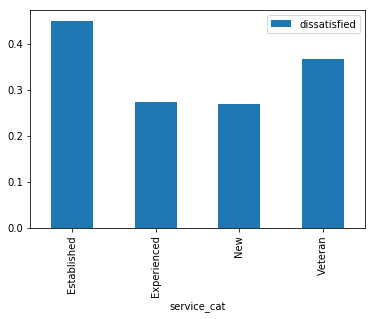

In [60]:
#plot of dissatisfied employees in each service category
dissatisfied_perc.plot(kind='bar')

Evidently, New employees represent the least - 27.1% - of dissatified employees, while, Established with 45.0%, followed by Veteran with 36.62% represents the percentage of the most dissatisfied employees. Conclusively, we could tell that older employees are more dissatisfied than newbies. Hence, the reason for resignation.

As an advice, Departments involved (DETE and TAFE) should review the plans for older employees that would make it favorable for them and reduce their dissatisfaction. 

Possibly, all staffs may be subjected to the same treatment, but, the newbies are able to deal cope with it since they are new to the system. Either way, it's important that the institutes review and pay close attention to the welfare of staffs to improve satisfaction.

In [61]:
combined_updated.isnull().sum()

age                   55
cease_date           217
dissatisfied           0
employment_status     54
gender                59
id                     0
institute              0
institute_service    267
position              53
separationtype         0
service_cat          267
dtype: int64

In [62]:
combined_updated.groupby('service_cat')['separationtype'].value_counts()

service_cat  separationtype                      
Established  Resignation                              21
             Resignation-Other reasons                 9
             Resignation-Other employer                7
             Resignation-Move overseas/interstate      3
Experienced  Resignation                              96
             Resignation-Other reasons                 8
             Resignation-Move overseas/interstate      7
             Resignation-Other employer                6
New          Resignation                             137
             Resignation-Move overseas/interstate      8
             Resignation-Other reasons                 6
             Resignation-Other employer                5
Veteran      Resignation                              36
             Resignation-Other reasons                20
             Resignation-Other employer               12
             Resignation-Move overseas/interstate      3
Name: separationtype, dtype: int64

Text(0.5,1,'Service Categories and Reasons for Resignation')

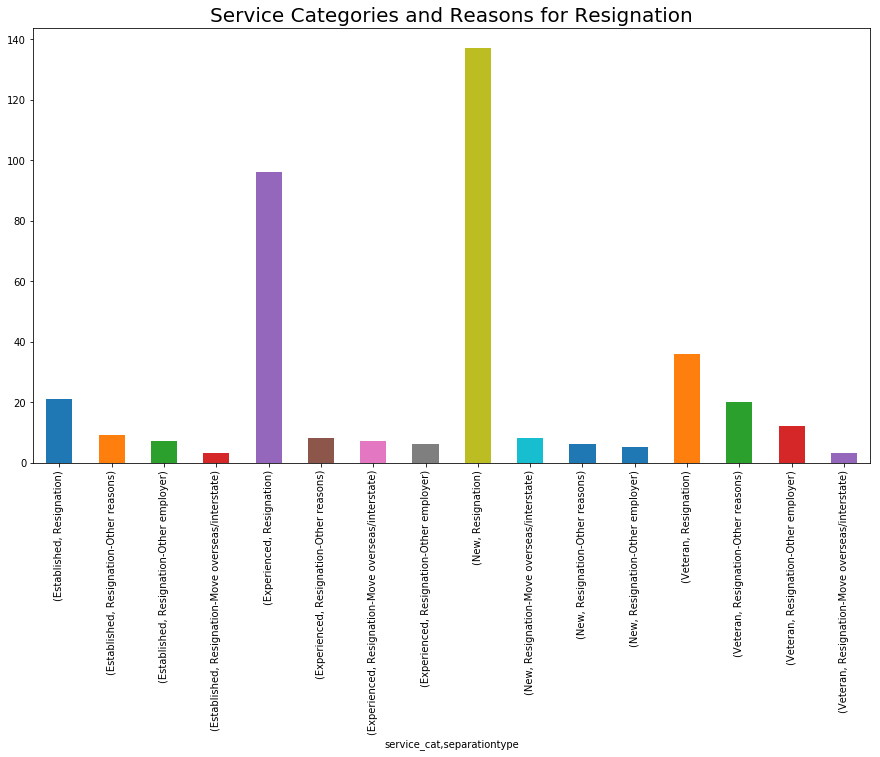

In [96]:
#plot of service categories and reason for resignation
combined_updated.groupby('service_cat')['separationtype'].value_counts().plot(kind='bar',figsize=(15,8))
plt.title('Service Categories and Reasons for Resignation',fontdict={'fontsize':20})

#### How many people in each age group resgined due to some kind of dissatisfaction?

In [69]:
#value counts of entries in the age column
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

The column shows inconsistency with he enries. To effectively answer the question above, we would have to clean the age column, similar to the dissatisfied column done earlier. Below shows the categories to be used:

* 20 or younger
* 21 - 30
* 31 - 40
* 41 - 50
* 51 - 60
* 61 or older

In [75]:
#extracting numbers and converting to floats
combined_updated['age'] = combined_updated['age'].astype(str).str.extract(r"([0-9]{2})").astype(float)

C:\Users\Memphis Ndego\Ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [76]:
combined_updated['age'].value_counts()

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [82]:
#function to map each age to age groups
def map_age(val):
    if pd.isnull(val):
        return np.nan
    elif val == 20:
        return '20 or younger'
    elif val > 20:
        if (val >= 21) & (val < 31):
            return '21 - 30'
        elif (val >= 31) & (val < 41):
            return '31 - 40'
        elif (val >= 41) & (val < 51):
            return '41 - 50'
        elif (val >= 51) & (val < 61):
            return '51 - 60'
        else:
            return '61 or older'

In [83]:
#applying function to the age column
combined_updated['age'] = combined_updated['age'].apply(map_age)

C:\Users\Memphis Ndego\Ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [85]:
#confirming changes made
combined_updated['age'].value_counts()

41 - 50          174
31 - 40          134
21 - 30          129
51 - 60          126
61 or older       23
20 or younger     10
Name: age, dtype: int64

Text(0.5,1,'Age Categories and Reasons for Resignation')

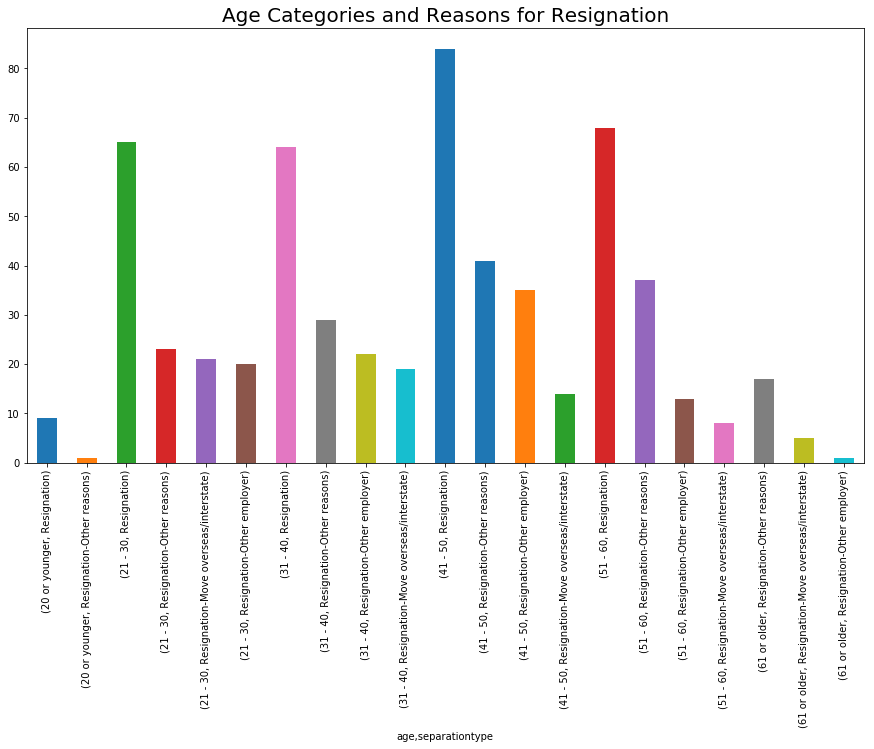

In [97]:
combined_updated.groupby('age')['separationtype'].value_counts().plot(kind='bar',figsize=(15,8))
plt.title('Age Categories and Reasons for Resignation',fontdict={'fontsize':20})

### Analyzing Institutes differently

Instead of analyzing surveys together, let's separate surveys to see if employees of each institute had a common dissatisfaction.

#### DETE

In [101]:
#selecting employees of the DETE institute
dete_resign = combined_updated[combined_updated['institute'] == 'DETE']

Text(0.5,1,'Plot of DETE Employees Dissatisfaction')

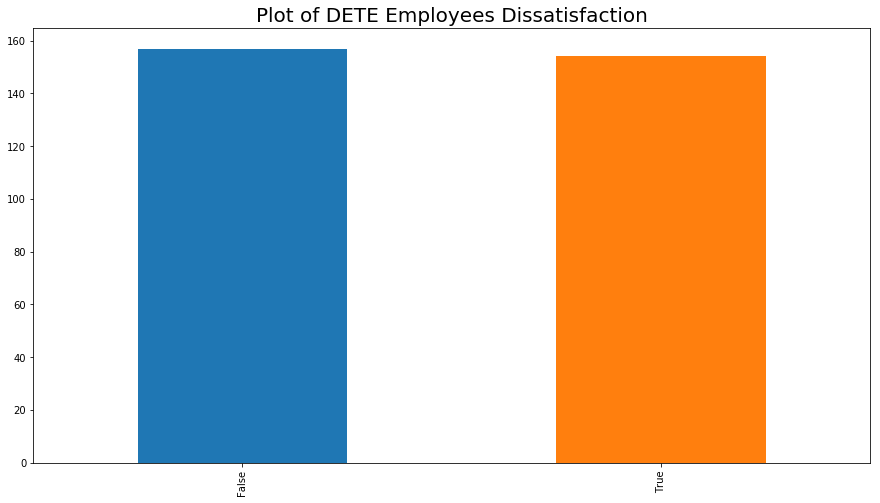

In [129]:
dete_resign['dissatisfied'].value_counts().plot(kind='bar',figsize=(15,8))
plt.title('Plot of DETE Employees Dissatisfaction',fontdict = {'fontsize':20})

#### TAFE

In [125]:
#selecting employees of the TAFE institute
tafe_resign = combined_updated[combined_updated['institute'] == 'TAFE']

Text(0.5,1,'Plot of TAFE Employees Dissatisfaction')

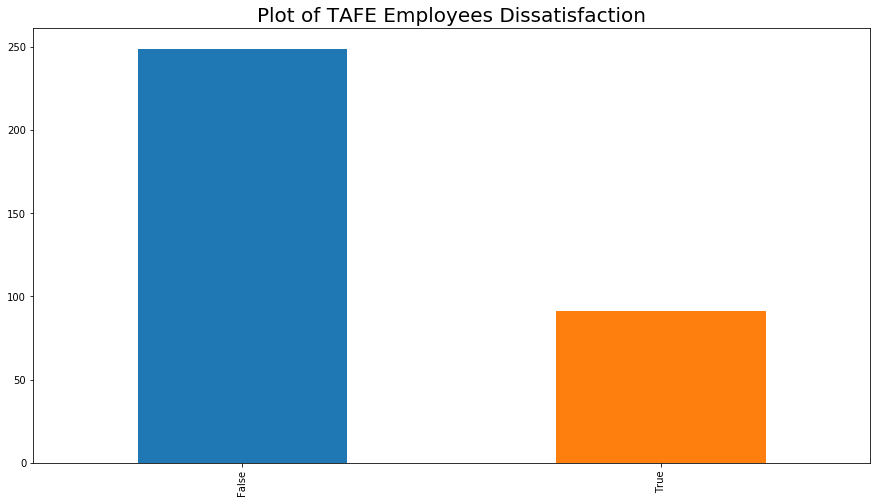

In [131]:
tafe_resign['dissatisfied'].value_counts().plot(kind='bar',figsize=(15,8))
plt.title('Plot of TAFE Employees Dissatisfaction',fontdict = {'fontsize':20})

Apparently, visuals confirm that DETE employees have more dissatisfied staffs compared to TAFE employees. DETE employee survey is seen to report almost equal number of dissatisfied and satisfied employees before resignation, and this is not good for an ideal work environment. It would be advisable for the personnel management team in the DETE institute to reveiw their employee welfare and ensure staffs are well taken take of. On the other hand, TAFE employee survey reports quite a large number of employees that resigned were actually satisfied with their work condition.

### Conclusion

In this project, we analyzed survey data from two institutes to understand employee satisfaction/dissatisfaction. conclusively, we were able to confirm that both institutes have employees resigning due to job dissatisfaction, although, DETE institute reports to have a more severe case. As a solution, institutes should ensure that employee satisfaction is always in check. Routine employee survey should be done, ensure feedback regarding better ways to improve their satisfaction is gotten from employees.